#Table of Contents
* [1. Week 2 Assignment: Running a Chi-Square Test of Independence](#1.-Week-2-Assignment:-Running-a-Chi-Square-Test-of-Independence)
	* [1.1 Descriptive analysis](#1.1-Descriptive-analysis)
	* [1.2 Create the categorical variables](#1.2-Create-the-categorical-variables)
		* [1.2.1 Variable `income_level`](#1.2.1-Variable-income_level)
		* [1.2.2 Variable `lifeexpectancy_level`](#1.2.2-Variable-lifeexpectancy_level)
	* [1.3 Cross tabulation of the categorical variables](#1.3-Cross-tabulation-of-the-categorical-variables)
	* [1.4 Perform the Chi-squared ($Xˆ2$) test](#1.4-Perform-the-Chi-squared-%28$Xˆ2$%29-test)
	* [1.5 Post hoc test](#1.5-Post-hoc-test)
		* [1.5.1 $X^2$ test for "Low life expct" vs "Medium life expct"](#1.5.1-$X^2$-test-for-"Low-life-expct"-vs-"Medium-life-expct")
		* [1.5.2 $X^2$ test for "Low income" vs "High income"](#1.5.2-$X^2$-test-for-"Low-income"-vs-"High-income")
		* [1.5.3 $X^2$ test for "Medium income" vs "High income"](#1.5.3-$X^2$-test-for-"Medium-income"-vs-"High-income")
	* [1.6 Conclusion](#1.6-Conclusion)


# 1. Week 2 Assignment: Running a Chi-Square Test of Independence

In this [assignment](https://www.coursera.org/learn/data-analysis-tools/peer/1QGTx/running-a-chi-square-test-of-independence) I've chosen the [Gapminder](./data/gapminder.csv) dataset. Looking through its [codebook](./data/GapMinderCodebook.pdf) we've decided to study two variables, incomeperperson and lifeexpectancy relationship:


- incomeperperson

> 2010 Gross Domestic Product per capita in constant 2000 US$. The World Bank Work Development inflation but not the differences in the cost of living between countries Indicators
has been taken into account.



- lifeexpectancy

> 2011 life expectancy at birth (years). The average number of years a newborn child would live if current mortality patterns were to stay the same.

In ordr to met the assignment requirements, we'll transform these numeric variables into categorical. The `incomeperperson` will be categorized using the [US poverty threshold](http://www.irp.wisc.edu/faqs/faq1.htm) as a guideline to divide this variable as those countries below the US threshold, those near and those equal or above. The `lifeexpectancy` variable will be categorized in the same way: those countries below USA life expectancy and those equal or above. We'll take USA out of the dataset as it was used as the baseline comparison.

The null hypothesis $H_o$ is that the life expectancy is independent of the income per capita. The alternative  hypothesis $H_a$ is that life expectancy is related to income.

In [1]:
# Import all ploting and scientific library,
# and embed figures in this file.
%pylab inline

# Package to manipulate dataframes.
import pandas as pd

# Nice looking plot functions.
import seaborn as sn

# The Chi-squared test function.
from scipy.stats import chi2_contingency

# Read the dataset.
df = pd.read_csv('data/gapminder.csv')

# Set the country name as the index of the dataframe.
df.index = df.country

# This column is no longer needed.
#del df['country']

# Select only the variables we're interested.
df = df[['lifeexpectancy','incomeperperson']]

# Convert the types properly.
#df.incomeperperson = pd.to_numeric(df.incomeperperson, errors='coerce')
#df.lifeexpectancy = pd.to_numeric(df.lifeexpectancy, errors='coerce')
df = df.convert_objects(convert_numeric=True)

# Remove missing values.
df = df.dropna()

# Save the life expectancy threshold for later use.
lifeexpectancy_threshold = df.loc['United States', 'lifeexpectancy']

# Finally, remove the USA from the dataset.
df.drop('United States', inplace=True)




Populating the interactive namespace from numpy and matplotlib


/Users/sergio/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:29: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


## 1.1 Descriptive analysis

Let's take a look at the variables.

In [2]:
df.describe()

,lifeexpectancy,incomeperperson
count,175.000000,175.000000
mean,69.604011,7155.080213
std,9.734076,10346.534469
min,47.794000,103.775857
25%,62.958000,691.093623
50%,73.126000,2344.896916
75%,76.337000,8165.497363
max,83.394000,52301.587179


## 1.2 Create the categorical variables

We'll create the categorical variable `income_level` based on USA poverty threshold and `lifeexpectancy_level` based on USA life expectancy.

### 1.2.1 Variable `income_level`

This variable describe the level of income per capita perceived by a country. We'll categorize it in three values: "Low income", "Medium income" and "High income". "Low income" if the income per person is below that 70% of USA threshold of poverty, "Medium income" if between the later and the threshold (not included), and "High income" if equal of above the trheshold.

In [3]:
# http://www.irp.wisc.edu/faqs/faq1.htm
income_threshold= 11720
income_level = pd.cut(df.incomeperperson, 
    [0,income_threshold*0.7, income_threshold, df.incomeperperson.max() ], 
    labels=['Low income', 'Medium income', 'High income'])


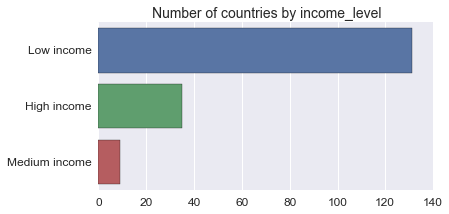

In [4]:
# Ghaph the new variable.
il = income_level.value_counts()
f, a = subplots()
f.set_size_inches(6,3)
sn.barplot(il.values, il.index.tolist(), ax=a);

a.set_title('Number of countries by income_level', fontsize=14);
yticks(fontsize=12),xticks(fontsize=12);

### 1.2.2 Variable `lifeexpectancy_level`

This variable describe the level of life exepctancy in a country. It can have two values: "Low life expct" and "High life expct". "Low life expct" if the life expectancy is belo the USA life expectancy presened in the same dataset, and "High life expct" otherwise.

In [5]:
lifeexpectancy_level =  pd.cut(df.lifeexpectancy, 
                               [0, lifeexpectancy_threshold, df.lifeexpectancy.max()],
                              labels=['Low life expct','High life expct'])

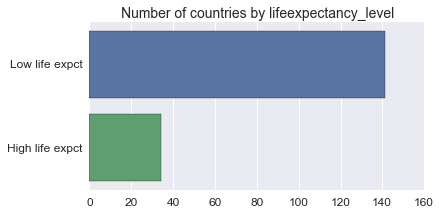

In [6]:
ll = lifeexpectancy_level.value_counts()
f, a = subplots()
f.set_size_inches(6,3)
sn.barplot(ll.values, ll.index.tolist(), ax=a);

a.set_title('Number of countries by lifeexpectancy_level', fontsize=14);
yticks(fontsize=12),xticks(fontsize=12);

Let's save the `income_level` and `lifeexpectancy_level` variables in our data frame. We must explicitly convert them to `object` because of an actual misunderstanding betwen `pandas` and `stastmodels` packages.

In [7]:
import numpy as np
df['income_level'] = income_level.astype(np.object)
df['lifeexpectancy_level'] = lifeexpectancy_level.astype(np.object)

## 1.3 Cross tabulation of the categorical variables

Below we have the contigency table of the variables in this study.

In [8]:
# Numeric cross tabulation.
xtab = pd.crosstab(df.lifeexpectancy_level, df.income_level)

# Sort manually the columns.
xtab = xtab[['High income', 'Medium income', 'Low income']]

# Print to output.
xtab

income_level,High income,Medium income,Low income
lifeexpectancy_level,,,
High life expct,30,1,3
Low life expct,5,8,128


In [9]:
# Percentage cross tabulation
xtabsum = xtab.sum(axis=0)
xtabpct = xtab/xtabsum
xtabpct

income_level,High income,Medium income,Low income
lifeexpectancy_level,,,
High life expct,0.857143,0.111111,0.022901
Low life expct,0.142857,0.888889,0.977099


In the next session, we'll see whether $H_o$ can be rejected or not.

## 1.4 Perform the Chi-squared ($Xˆ2$) test

The $Xˆ2$ test will tell us whether the two variables are independent or not. For a 2x2 comparison, the $X^2$ value is large, $123.00$, and the `p-value` is really small, $1.95*10^{-27}$, thus, the life expectancy level and income level aren't independent, they're related.

In [10]:
x2 = chi2_contingency(xtab)
x2

(123.21793604742712,
 1.752125263037061e-27,
 2,
 array([[   6.8       ,    1.74857143,   25.45142857],
        [  28.2       ,    7.25142857,  105.54857143]]))

In [11]:
print("Chi-squared: {:.3}\nP-value: {:.3}".format(x2[0], x2[1]))

Chi-squared: 1.23e+02
P-value: 1.75e-27


Our explanatory variable has 3 possible levels, and the $X^2$ does'nt give us insight into why the $H_o$ can be rejected. We do know the life expectancy varies across the income levels but to understand how, we'll have to conduct a post hoc test.

## 1.5 Post hoc test

We'll use the [Bonferroni Adjustemnt](https://en.wikipedia.org/wiki/Bonferroni_correction) to control the family wise error rate. As our explanatory variable has 3 levels, we must adjust the p-value dividing the alpha significance $0.05$ level by $3$:

In [12]:
# The p-value adjusted.
pvalue_adj = 0.05/3.0
print("The p-value adjusted is: {:.3}".format(pvalue_adj))

The p-value adjusted is: 0.0167


Now we have to perform paiwise $X^2$ tests.

### 1.5.1 $X^2$ test for "Low life expct" vs "Medium life expct"

In [13]:
recode = {'Low income': 'Low income', 'Medium income':'Medium income'}
df['income_LvM'] = df.income_level.map(recode)

In [14]:
# Crosstab.
xtab_LvM = pd.crosstab(df.lifeexpectancy_level, df.income_LvM)
xtab_LvM

income_LvM,Low income,Medium income
lifeexpectancy_level,,
High life expct,3,1
Low life expct,128,8


In [15]:
# Percentage crosstab.
xtab_LvM/xtab_LvM.sum(axis=0)

income_LvM,Low income,Medium income
lifeexpectancy_level,,
High life expct,0.022901,0.111111
Low life expct,0.977099,0.888889


In [16]:
# Run the chi-square test.
x2_LvM = chi2_contingency(xtab_LvM)

# Print the results.
print("Chi-squared: {:.3}\nP-value: {:.3}\nP-value ajd: {:.3}".format(x2_LvM[0], x2_LvM[1], pvalue_adj))

Chi-squared: 0.252
P-value: 0.615
P-value ajd: 0.0167


As you can see above, the $X^2$ is not large, and the `p-value` is greater than the `adjusted p-value`. So, we can't reject $H_o$ and state that life expectancy doesn't differ significantly between "Low income" and "Medium income" countries.

### 1.5.2 $X^2$ test for "Low income" vs "High income"

In [17]:
recode = {'Low income': 'Low income', 'High income':'High income'}
df['income_LvH'] = df.income_level.map(recode)

In [18]:
# Crosstab.
xtab_LvH = pd.crosstab(df.lifeexpectancy_level, df.income_LvH)
xtab_LvH

income_LvH,High income,Low income
lifeexpectancy_level,,
High life expct,30,3
Low life expct,5,128


In [19]:
# Percentage crosstab.
xtab_LvH/xtab_LvH.sum(axis=0)

income_LvH,High income,Low income
lifeexpectancy_level,,
High life expct,0.857143,0.022901
Low life expct,0.142857,0.977099


In [20]:
# Run the chi-square test.
x2_LvH = chi2_contingency(xtab_LvH)

# Print the results.
print("Chi-squared: {:.3}\nP-value: {:.3}\nP-value ajd: {:.3}".format(x2_LvH[0], x2_LvH[1], pvalue_adj))

Chi-squared: 1.16e+02
P-value: 6.09e-27
P-value ajd: 0.0167


As you can see above, the $X^2$ is large, and the `p-value` is below than the `adjusted p-value`. So, we can reject $H_o$ and state that life expectancy does differ significantly between "Low income" and "High income" countries.

### 1.5.3 $X^2$ test for "Medium income" vs "High income"

In [21]:
recode = {'Medium income': 'Medium income', 'High income':'High income'}
df['income_MvH'] = df.income_level.map(recode)

In [22]:
# Crosstab.
xtab_MvH = pd.crosstab(df.lifeexpectancy_level, df.income_MvH)
xtab_MvH

income_MvH,High income,Medium income
lifeexpectancy_level,,
High life expct,30,1
Low life expct,5,8


In [23]:
# Percentage crosstab.
xtab_MvH/xtab_MvH.sum(axis=0)

income_MvH,High income,Medium income
lifeexpectancy_level,,
High life expct,0.857143,0.111111
Low life expct,0.142857,0.888889


In [24]:
# Run the chi-square test.
x2_MvH = chi2_contingency(xtab_MvH)

# Print the results.
print("Chi-squared: {:.3}\nP-value: {:.3}\nP-value ajd: {:.3}".format(x2_MvH[0], x2_MvH[1], pvalue_adj))

Chi-squared: 15.7
P-value: 7.32e-05
P-value ajd: 0.0167


As you can see above, the $X^2$ is large, and the `p-value` is below than the `adjusted p-value`. So, we can reject $H_o$ and state that life expectancy does differ significantly between "Medium income" and "High income" countries.

## 1.6 Conclusion

By the $X^2$ tests conducted above, the life expectancy is dependent of the income per person. Countries with high income per person benefit from a longer life expectancy when compared to countries with low and medium income per person. There is no difference in life expectancy between countries with low and medium income per person.

End of assignment.